In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import PIL
import cv2

from tensorflow import keras
from tensorflow.keras.models import Sequential
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.optimizers import *
from tensorflow.keras import *
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D,BatchNormalization,Input, Lambda
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
IMAGE_SIZE = [224, 224]

In [3]:
train_path = "C:\\Users\\Nethmi Mohotti\\Desktop\\CobraShot\\Data Science\\dataset\\train"
test_path = "C:\\Users\\Nethmi Mohotti\\Desktop\\CobraShot\\Data Science\\dataset\\testing"

In [4]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [5]:
for layer in vgg.layers:
  layer.trainable = False

In [6]:
from glob import glob
folders = glob("C:\\Users\\Nethmi Mohotti\\Desktop\\CobraShot\\Data Science\\dataset\\train\\*")
print(len(folders))

7


In [7]:
x = Flatten()(vgg.output)

In [8]:
prediction = Dense(len(folders), activation='softmax')(x)

In [9]:
model = Model(inputs=vgg.input, outputs=prediction)

In [10]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [11]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [12]:
train_dataset = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_dataset = ImageDataGenerator(rescale = 1./255)

In [13]:
training_set = train_dataset.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

testing_set = test_dataset.flow_from_directory(test_path, 
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 2473 images belonging to 7 classes.
Found 83 images belonging to 7 classes.


In [14]:
training_set.class_indices

{'Black rat snake': 0,
 'Common garter snake': 1,
 'Common watersnake': 2,
 "Russell's Viper": 3,
 'Saw-scaled Viper': 4,
 'Spectacled Cobra': 5,
 'Western diamondback rattlesnake': 6}

In [15]:
training_set.classes

array([0, 0, 0, ..., 6, 6, 6])

In [16]:
cobrashot_model = model.fit(
  training_set,
  validation_data=testing_set,
  epochs=35,
  batch_size=20
  
)

Epoch 1/35
78/78 [==============================] - 591s 8s/step - loss: 1.5378 - accuracy: 0.4800 - val_loss: 1.1176 - val_accuracy: 0.5542
Epoch 2/35
78/78 [==============================] - 601s 8s/step - loss: 0.9797 - accuracy: 0.6466 - val_loss: 1.0372 - val_accuracy: 0.6386
Epoch 3/35
78/78 [==============================] - 549s 7s/step - loss: 0.8396 - accuracy: 0.6992 - val_loss: 0.8538 - val_accuracy: 0.6988
Epoch 4/35
78/78 [==============================] - 360s 5s/step - loss: 0.7506 - accuracy: 0.7368 - val_loss: 1.3564 - val_accuracy: 0.6506
Epoch 5/35
78/78 [==============================] - 341s 4s/step - loss: 0.7151 - accuracy: 0.7525 - val_loss: 0.8868 - val_accuracy: 0.6988
Epoch 6/35
78/78 [==============================] - 347s 4s/step - loss: 0.5456 - accuracy: 0.8015 - val_loss: 0.8463 - val_accuracy: 0.6627
Epoch 7/35
78/78 [==============================] - 353s 5s/step - loss: 0.4799 - accuracy: 0.8334 - val_loss: 0.9271 - val_accuracy: 0.6747
Epoch 8/35
78

In [17]:
#list all data in training
print(cobrashot_model.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


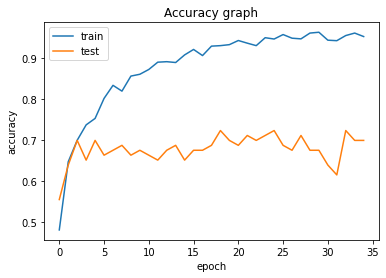

In [18]:
# summarize training for accuracy
plt.plot(cobrashot_model.history['accuracy'])
plt.plot(cobrashot_model.history['val_accuracy'])
plt.title('Accuracy graph')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'], loc='upper left')
plt.show()

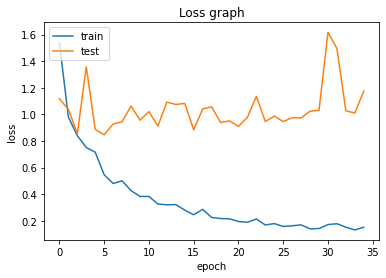

In [19]:

# summarize training for loss
plt.plot(cobrashot_model.history['loss'])
plt.plot(cobrashot_model.history['val_loss'])
plt.title('Loss graph')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [20]:
#create the model
from tensorflow.keras.models import load_model
model.save('cobrashot_model.h5')

In [21]:
#load the model and save
from keras.models import load_model
cobrashot_model = load_model('cobrashot_model.h5')